## 决策树与随机森林

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### 决策树
>随机森林是建立在决策树基础上的集成学习器

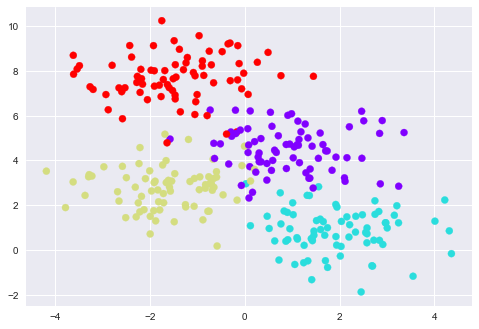

In [9]:
from sklearn.datasets import make_blobs

X,y=make_blobs(n_samples=300,centers=4,random_state=0,cluster_std=1.0)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')

### 想在 Scikit-Learn 中使用决策树拟合数据，可以用 DecisionTreeClassifier 评估器：

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()
tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    # 画出训练数据
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # 用评估器拟合数据
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
    np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # 为结果生成彩色图
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,levels=np.arange(n_classes + 1) - 0.5,cmap=cmap, clim=(y.min(), y.max()),zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

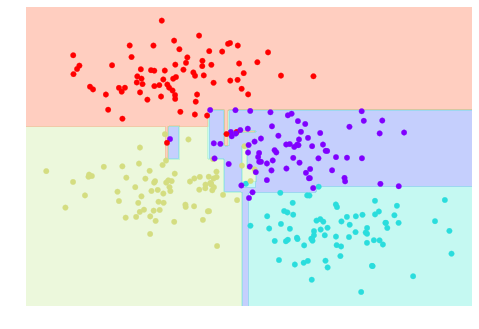

In [14]:
visualize_classifier(DecisionTreeClassifier(), X, y)

### 决策树与过拟合

### 评估器集成算法： 随机森林

* 通过组合多个过拟合评估器来降低过拟合程度的想法其实是一种集成学习方法，称为**装袋算法**。装袋算法使用并行评估器对数据进行有放回抽取集成（也可以说是大杂烩），每个评估器都对数据过拟合，通过求均值可以获得更好的分类结果。随机决策树的集成算法就是**随机森林**。

---
* 可以用 Scikit-Learn 的 BaggingClassifier 元评估器来实现这种装袋分类器

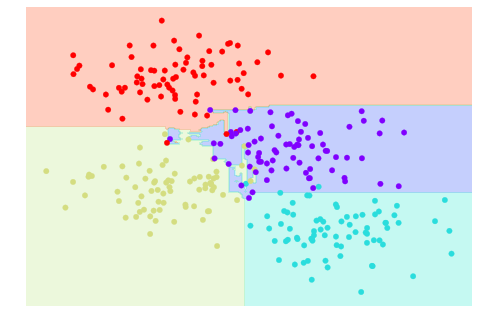

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag=BaggingClassifier(tree,n_estimators=100,max_samples=0.8,random_state=1)

visualize_classifier(bag,X,y)

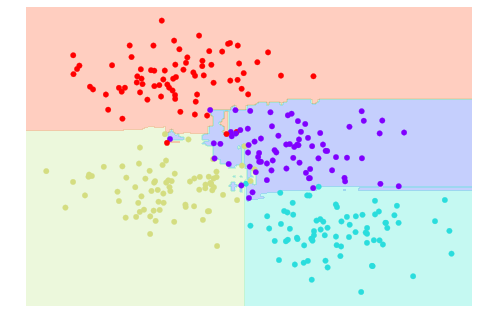

In [26]:
#在 Scikit-Learn 里对随机决策树集成算法的优化是通过 RandomForestClassifier 评估器实现的，它会自动进行随机化决策。
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=0)
visualize_classifier(model, X, y);

## 随机森林回归

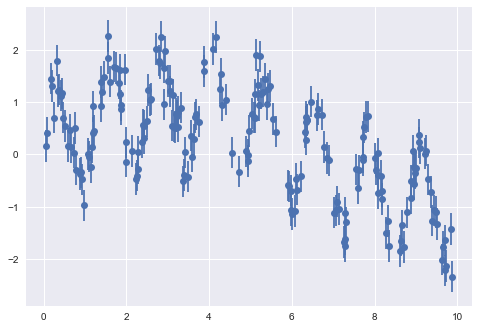

In [27]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise
y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

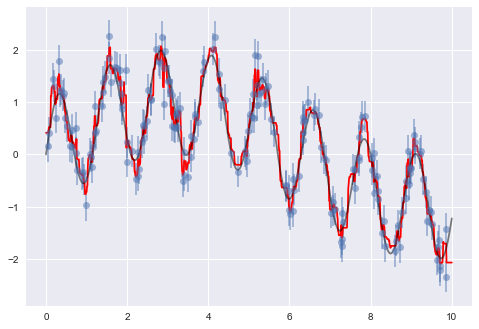

In [29]:
from sklearn.ensemble import RandomForestRegressor  #随机森林回归器
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

## 案例：随机森林处理手写体识别

In [30]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

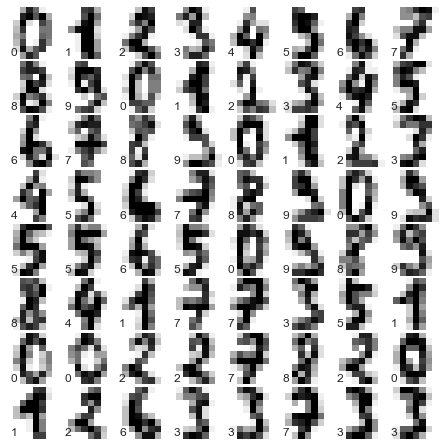

In [35]:
#显示前几个数字图像，看下分类的对象
fig = plt.figure(figsize=(6, 6)) # 以英寸为单位
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# 画数字：每个数字是8像素×8像素
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # 用target值给图像作标注
    ax.text(0, 7, str(digits.target[i]))

In [37]:
from sklearn.cross_validation import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(digits.data,digits.target,random_state=0)

model=RandomForestClassifier(n_estimators=1000) #用1000棵决策树进行决策
model.fit(Xtrain,ytrain)
ypred=model.predict(Xtest)  #进行预测


In [38]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))  #打印分类报告

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       0.98      0.95      0.97        44
          2       0.95      1.00      0.98        42
          3       0.98      0.98      0.98        45
          4       0.97      1.00      0.99        37
          5       0.98      0.96      0.97        49
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



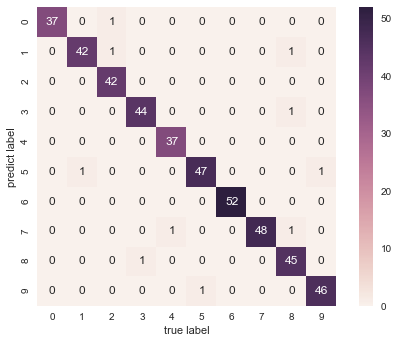

In [54]:
#为了更好的查看效果，画出混淆矩阵
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(ytest,ypred)
sns.heatmap(mat.T,square=True,annot=True)
plt.xlabel('true label')
plt.ylabel('predict label')

### 5.8.5　随机森林总结
这一节首先简要介绍了集成评估器的概念，然后重点介绍了随机森林模型——一种随机决
策树集成算法。随机森林是一种强大的机器学习方法，它的优势在于以下几点。

* 因为决策树的原理很简单，所以它的训练和预测速度都非常快。另外，多任务可以直接
并行计算，因为每棵树都是完全独立的。

* 多棵树可以进行概率分类：多个评估器之间的多数投票可以给出概率的估计值（使用
Scikit-Learn 的 predict_proba() 方法）。
* 无参数模型很灵活，在其他评估器都欠拟合的任务中表现突出。

随机森林的主要缺点在于其结果不太容易解释，也就是说，如果你想要总结分类模型的意
义，随机森林可能不是最佳选择。